In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#设置plt绘图中文显示和行内绘制
plt.rcParams['font.sans-serif'] = 'SimHei'
%matplotlib inline

In [11]:
#1.加载数据 
data1 = pd.read_excel('practice_data/meal_order_detail.xlsx', sheet_name='meal_order_detail1')
data2 = pd.read_excel('practice_data/meal_order_detail.xlsx', sheet_name='meal_order_detail2')
data3 = pd.read_excel('practice_data/meal_order_detail.xlsx', sheet_name='meal_order_detail3')
#2.数据预处理（合并，NA等），分析数据
data = pd.concat([data1, data2, data3], axis = 0)
data.dropna(axis=1, inplace=True)
data.head()

,detail_id,order_id,dishes_id,dishes_name,itemis_add,counts,amounts,place_order_time,add_inprice,picture_file,emp_id
0,2956,417,610062,蒜蓉生蚝,0,1,49,2016-08-01 11:05:36,0,caipu/104001.jpg,1442
1,2958,417,609957,蒙古烤羊腿,0,1,48,2016-08-01 11:07:07,0,caipu/202003.jpg,1442
2,2961,417,609950,大蒜苋菜,0,1,30,2016-08-01 11:07:40,0,caipu/303001.jpg,1442
3,2966,417,610038,芝麻烤紫菜,0,1,25,2016-08-01 11:11:11,0,caipu/105002.jpg,1442
4,2968,417,610003,蒜香包,0,1,13,2016-08-01 11:11:30,0,caipu/503002.jpg,1442


In [15]:
#统计卖出菜品的平均价格
round(np.mean(data['amounts']), 2) #更高效的方法

44.82

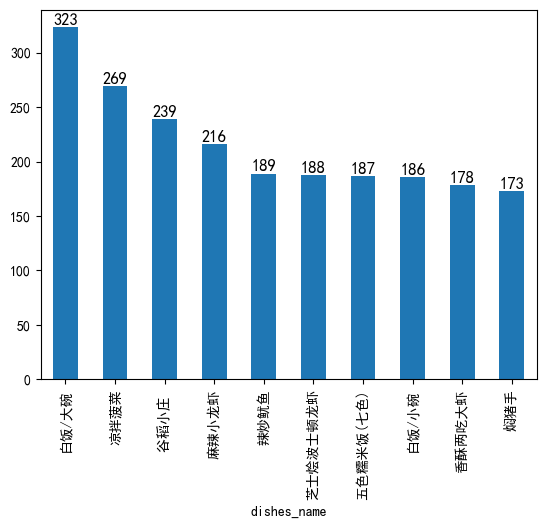

In [25]:
#统计什么菜最受欢迎
dishes_count = data['dishes_name'].value_counts()[:10]
#3. 数据可视化
dishes_count.plot(kind='bar')
for idx,price in enumerate(dishes_count):
    plt.text(idx, price + 2, price, ha='center', fontsize=12)

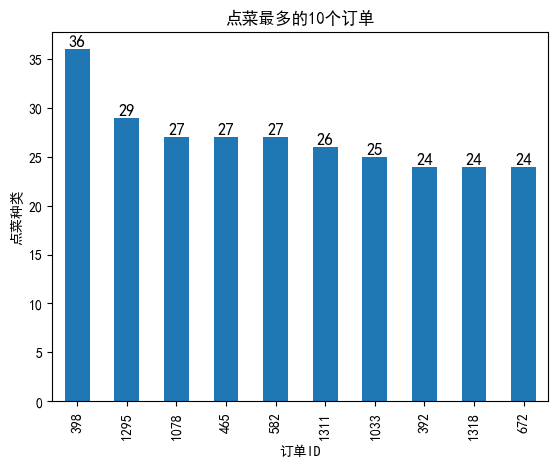

In [33]:
#订单点菜的种类最多
dishes_counts_per_order = data['order_id'].value_counts()[:10]
dishes_counts_per_order.plot(kind='bar')
plt.title('点菜最多的10个订单')
plt.xlabel('订单ID')
plt.ylabel('点菜种类')
for idx, nums in enumerate(dishes_counts_per_order):
    plt.text(idx, nums+0.3, nums, ha='center', fontsize=12)

Text(0, 0.5, '点菜数量')

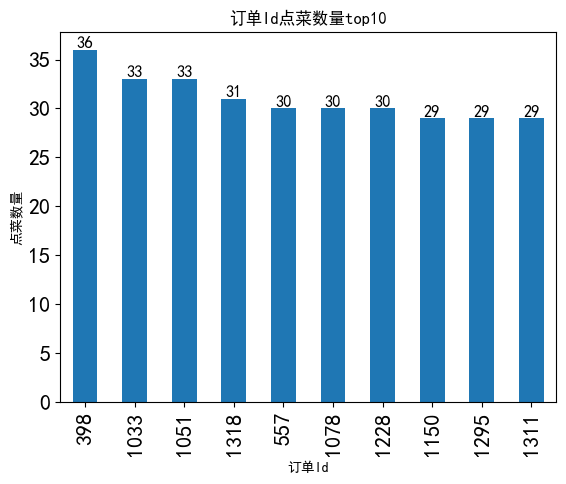

In [50]:
#订单id点菜数量top10
data['total_amounts'] = data['counts'] * data['amounts']
dataGroup = data[['order_id', 'counts', 'amounts', 'total_amounts']].groupby(by='order_id')
group_sum = dataGroup.sum()
sort_counts = group_sum.sort_values(by='counts', ascending=False)
sort_counts['counts'][:10].plot(kind='bar',fontsize=16)
for idx, cnts in enumerate(sort_counts['counts'][:10]):
    plt.text(idx, cnts+0.2, cnts, ha='center', fontsize=12)
plt.title('订单Id点菜数量top10')
plt.xlabel('订单Id')
plt.ylabel('点菜数量')

Text(0, 0.5, '消费总额')

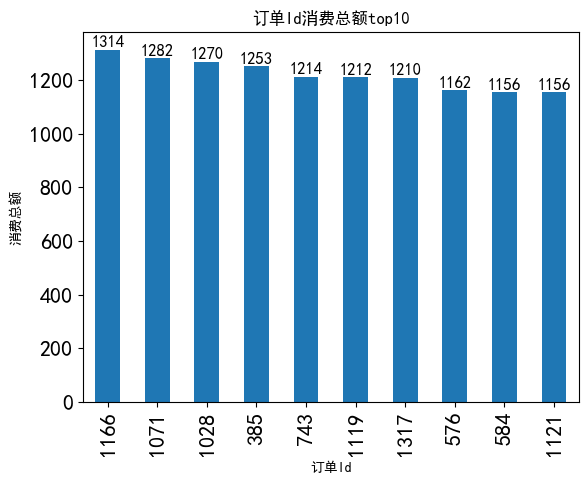

In [54]:
#订单Id消费总额
sort_total_amounts = group_sum.sort_values(by='total_amounts', ascending=False)
sort_total_amounts['total_amounts'][:10].plot(kind='bar',fontsize=16)
for idx, cnts in enumerate(sort_total_amounts['total_amounts'][:10]):
    plt.text(idx, cnts+10, cnts, ha='center', fontsize=12)
plt.title('订单Id消费总额top10')
plt.xlabel('订单Id')
plt.ylabel('消费总额')

Text(0.5, 1.0, '订单菜品平均价格分布')

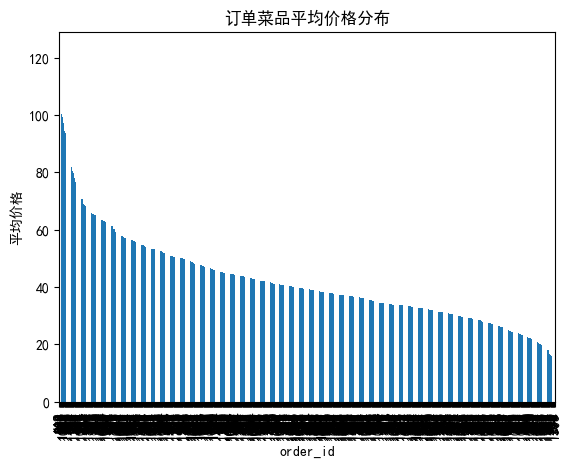

In [56]:
 #订单菜品平均价格分布
group_sum['avg_price'] = group_sum['total_amounts'] / group_sum['counts']
sort_avg_price = group_sum.sort_values(by='avg_price', ascending=False)
sort_avg_price['avg_price'].plot(kind='bar')
plt.ylabel('平均价格')
plt.title('订单菜品平均价格分布')

Text(0.5, 1.0, '平均点菜数量基于小时分布')

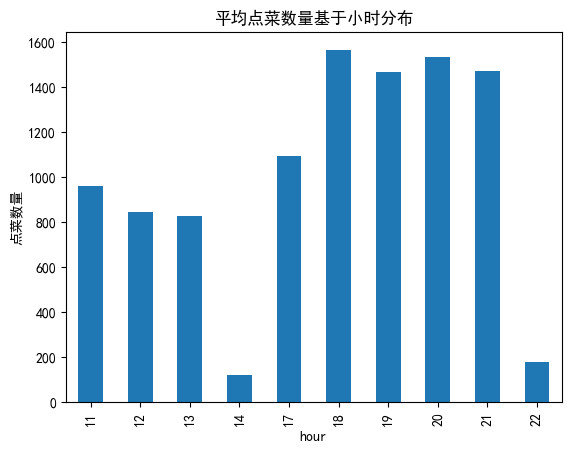

In [60]:
#一天当中什么时间段点菜量比较集中
data['hourcount'] = 1 
data['time'] = pd.to_datetime(data['place_order_time'])
data['hour'] = data['time'].map(lambda x: x.hour)
gp_by_hour = data.groupby(by='hour')['hourcount'].count()
gp_by_hour.plot(kind='bar')
plt.ylabel('点菜数量')
plt.title('平均点菜数量基于小时分布')

Text(0.5, 1.0, '平均点菜数量基于天数分布')

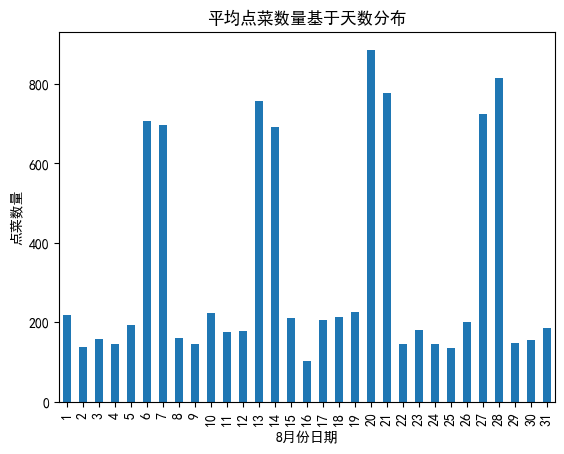

In [62]:
data['day'] = data['time'].map(lambda x: x.day)
gp_by_day = data.groupby(by='day').count()['hourcount']
gp_by_day.plot(kind='bar')
plt.xlabel('8月份日期')
plt.ylabel('点菜数量')
plt.title('平均点菜数量基于天数分布')